In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
weapon_df = pd.DataFrame()
for year in range(2021,2016,-1):
    df = pd.read_csv(f"./arrestee_weapon_{year}.csv")
    df.columns= df.columns.str.lower()
    df.drop(['nibrs_arrestee_weapon_id','arrestee_id'],axis=1,inplace=True)
    weapon_df = pd.concat([weapon_df,df])

In [30]:
weapon_df

,data_year,weapon_id
0,2021,51
1,2021,51
2,2021,51
3,2021,51
4,2021,51
...,...,...
2262,2017,1
2263,2017,1
2264,2017,1
2265,2017,1


In [31]:
weapon_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33576 entries, 0 to 2266
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   data_year  33576 non-null  int64
 1   weapon_id  33576 non-null  int64
dtypes: int64(2)
memory usage: 786.9 KB


In [50]:
weaponCount_df = pd.DataFrame(weapon_df.groupby(['data_year','weapon_id']).size())

In [114]:
weaponCount_df

0
data_year weapon_id       
2017      1           2258
          3              3
          7              5
          22             1
2018      1           1585
          2              1
          3              1
          7              4
2019      1            936
          2              1
          3              3
          6              1
          7              1
          8              1
2020      1            385
2021      1            127
          2             40
          3           2249
          4            148
          5             54
          6              7
          7             32
          9             37
          51         25028
          52           489
          53           179

In [94]:
firearm = np.isin(weaponCount_df.loc[(2020,)].index,[2,3,4,5,6,21,22,23,24,25],1,0)

In [95]:
firearm

array([False])

In [97]:
#the weapon's corresponding weapon_id is different for each year

#2021
firearm_df = pd.DataFrame()
firearm = np.where(weaponCount_df.loc[(2021,)].index<=10,True,False)
df = weaponCount_df.loc[(2021,)].groupby(firearm)[0].sum()
firearm_df['2021'] = df

for year in range(2020,2016,-1):
    firearm = np.isin(weaponCount_df.loc[(year,)].index,[2,3,4,5,6,21,22,23,24,25],1,0)
    df = weaponCount_df.loc[(year,)].groupby(firearm)[0].sum()
    firearm_df[f'{year}'] = df

In [107]:
firearm_df = firearm_df.fillna(0)

In [117]:
firearm_df = firearm_df.T.sort_index()

In [118]:
firearm_df

,False,True
2017,2263.0,4.0
2018,1589.0,2.0
2019,938.0,5.0
2020,385.0,0.0
2021,25696.0,2694.0


<AxesSubplot:>

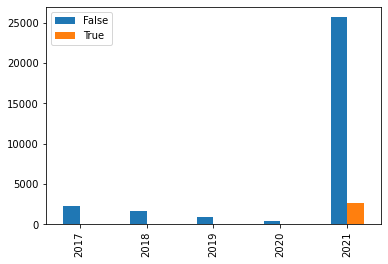

In [119]:
firearm_df.plot.bar()

In [127]:
firearm_df[False]

2017     2263.0
2018     1589.0
2019      938.0
2020      385.0
2021    25696.0
Name: False, dtype: float64

In [133]:
sums_df = firearm_df.sum(axis = 1)
firearmPercent_df = pd.DataFrame()
firearmPercent_df[False]= firearm_df[False]/sums_df
firearmPercent_df[True]= firearm_df[True]/sums_df

In [134]:
firearmPercent_df

,False,True
2017,0.998236,0.001764
2018,0.998743,0.001257
2019,0.994698,0.005302
2020,1.000000,0.000000
2021,0.905107,0.094893


<AxesSubplot:>

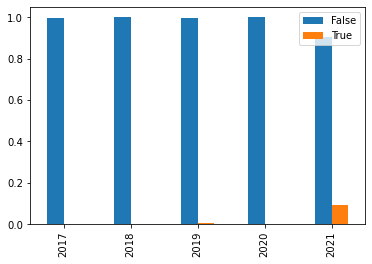

In [135]:
firearmPercent_df.plot.bar()